In [2]:
from glob import glob
import pandas as pd

from pandas import read_csv
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


In [3]:
pd1=pd.read_csv('/home/ubuntu/merged_job_events.csv')

In [4]:
pd1.columns
len(pd1)

2208576

In [5]:
subset1 = pd1.loc[pd1['event type'].isin(['2','3','4','5'])]
print(len(subset1))

730725


In [6]:
np.unique(subset1['event type'])

array([2, 3, 4, 5])

In [7]:
a = subset1.groupby(['user name','event type'])['event type'].count()

In [8]:
a.to_csv('count_list.csv')

In [9]:
b = pd.read_csv('count_list.csv', names=['user name','event type', 'count'])
print(b)

                                         user name  event type  count
0     +3JB3kdkUWPSK/CxL2eTwBJ+2emDAp9S+1URmz7bH2E=           5      1
1     +Af/i5ZErwztHIZu1WncL3sjY6IP9qyJNINnOsleT0Y=           5      6
2     +BW2jvyXVN9T37gC63oaM8+kpVC5ZtzzPvx5CnygmmY=           5     10
3     +ENeFB0lOVM//Cb4Jl0AY6TiNoKa1ziTUY9PrN23hos=           3      1
4     +ENeFB0lOVM//Cb4Jl0AY6TiNoKa1ziTUY9PrN23hos=           5     28
5     +I3+x4vd6Y687bNrFXR1hSJ4+1SQGBGw1eixBd/TPEk=           5      1
6     +JmoeeiiLYqLtnUCl8L2eisWnCDunMDQQ8+OCCQdEmI=           3     45
7     +JmoeeiiLYqLtnUCl8L2eisWnCDunMDQQ8+OCCQdEmI=           4    500
8     +JmoeeiiLYqLtnUCl8L2eisWnCDunMDQQ8+OCCQdEmI=           5     18
9     +LSGdEqMvoRv2C0Gj1MK/k2Pzz70oCg1SFUZXkIXqI4=           4      3
10    +LSGdEqMvoRv2C0Gj1MK/k2Pzz70oCg1SFUZXkIXqI4=           5     21
11    +LSdepXha5sxIM4HrbKYSWX7+ow4rjmfmI6YzE/QbpQ=           5      1
12    +OUmAt8SDPVnr20aqYZRt0DQdAAddxrTz4UnFkQnsAI=           5     13
13    +SffpzPzB6mHA8

In [10]:
u_users = np.unique(b['user name'])
print (len(u_users), u_users)

702 ['+3JB3kdkUWPSK/CxL2eTwBJ+2emDAp9S+1URmz7bH2E='
 '+Af/i5ZErwztHIZu1WncL3sjY6IP9qyJNINnOsleT0Y='
 '+BW2jvyXVN9T37gC63oaM8+kpVC5ZtzzPvx5CnygmmY='
 '+ENeFB0lOVM//Cb4Jl0AY6TiNoKa1ziTUY9PrN23hos='
 '+I3+x4vd6Y687bNrFXR1hSJ4+1SQGBGw1eixBd/TPEk='
 '+JmoeeiiLYqLtnUCl8L2eisWnCDunMDQQ8+OCCQdEmI='
 '+LSGdEqMvoRv2C0Gj1MK/k2Pzz70oCg1SFUZXkIXqI4='
 '+LSdepXha5sxIM4HrbKYSWX7+ow4rjmfmI6YzE/QbpQ='
 '+OUmAt8SDPVnr20aqYZRt0DQdAAddxrTz4UnFkQnsAI='
 '+SffpzPzB6mHA8bvRv2jrKrBMu2u0xuP7Sp1hCWztr8='
 '+YtefvB6dPk+AK3hu/xkBcvpWM8hMCLpBbxVzA5YG58='
 '+cz+wEXttqDjld+YWLmrgqExjdqiHMZ2WZODThyR9jE='
 '+iApys7Av1vwVILsGwqHlAML+SPG8Ar78lvVv1Yr15E='
 '+iyX5HUcQOQV5mUASrNLoNQJlMbHRmriS33GBzFYzNE='
 '+kx6eUwGVEUhXR2/VSCytc/xen7B2BJTTM51LV2XknM='
 '+sRcBxv+KPSkXRwLJpm2wHQ9dAWZqmLnez04cEW0Je8='
 '/2WebBqImWuoAsnGB4CcpuKuNXVXCMiNPvDLG5cMlPQ='
 '/7nOKrsKf4bsF4i2nvCcRszsjYZ+0UOZGgYr5d8DtWg='
 '/9lxytyTIlevbcIIgYhqx45HsxZkNQ4OU0WmhZzuD4s='
 '/ADqb6ab3/Bxrz3dyZaDPRX7DAfUdiR+JTSVDrtJ+qU='
 '/DWNzLUYt1b87cIWYd0vW5P9iNmPH8XdJV

In [77]:
user_data = []
for user in u_users:
    s1 = b.loc[b['user name'] == user]
    total = float(sum(s1['count']))
    evict = 0.0
    fail = 0.0
    finish = 0.0
    kill = 0.0
    evict_ratio = 0.0
    fail_ratio = 0.0
    finish_ratio = 0.0
    kill_ratio = 0.0
    
    for index, row in s1.iterrows():
        
        if row['event type'] == 2:
            evict = float(row['count'])
        
        if row['event type'] == 3:
            fail = float(row['count'])
            
        if row['event type'] == 4:
            finish = float(row['count'])
            
        if row['event type'] == 5:
            kill = float(row['count'])
            
    evict_ratio = evict / total
    fail_ratio = fail / total
    finish_ratio = finish / total
    kill_ratio = kill / total
    user_data.append([user, evict_ratio, fail_ratio, finish_ratio, kill_ratio])

In [78]:
df = pd.DataFrame.from_records(user_data)

In [79]:
df.iloc[0]

0    +3JB3kdkUWPSK/CxL2eTwBJ+2emDAp9S+1URmz7bH2E=
1                                               0
2                                               0
3                                               0
4                                               1
Name: 0, dtype: object

In [80]:
df1=df.drop(df.columns[0], axis=1)

In [254]:
df.columns=['user', 'evict_ratio', 'fail_ratio', 'finish_ratio', 'kill_ratio']
df

,user,evict_ratio,fail_ratio,finish_ratio,kill_ratio
0,+3JB3kdkUWPSK/CxL2eTwBJ+2emDAp9S+1URmz7bH2E=,0.000000,0.000000,0.000000,1.000000
1,+Af/i5ZErwztHIZu1WncL3sjY6IP9qyJNINnOsleT0Y=,0.000000,0.000000,0.000000,1.000000
2,+BW2jvyXVN9T37gC63oaM8+kpVC5ZtzzPvx5CnygmmY=,0.000000,0.000000,0.000000,1.000000
3,+ENeFB0lOVM//Cb4Jl0AY6TiNoKa1ziTUY9PrN23hos=,0.000000,0.034483,0.000000,0.965517
4,+I3+x4vd6Y687bNrFXR1hSJ4+1SQGBGw1eixBd/TPEk=,0.000000,0.000000,0.000000,1.000000
5,+JmoeeiiLYqLtnUCl8L2eisWnCDunMDQQ8+OCCQdEmI=,0.000000,0.079929,0.888099,0.031972
6,+LSGdEqMvoRv2C0Gj1MK/k2Pzz70oCg1SFUZXkIXqI4=,0.000000,0.000000,0.125000,0.875000
7,+LSdepXha5sxIM4HrbKYSWX7+ow4rjmfmI6YzE/QbpQ=,0.000000,0.000000,0.000000,1.000000
8,+OUmAt8SDPVnr20aqYZRt0DQdAAddxrTz4UnFkQnsAI=,0.000000,0.000000,0.000000,1.000000
9,+SffpzPzB6mHA8bvRv2jrKrBMu2u0xuP7Sp1hCWztr8=,0.000000,0.000000,1.000000,0.000000


In [260]:
df1.columns=['evict_ratio', 'fail_ratio', 'finish_ratio', 'kill_ratio']
df1

,evict_ratio,fail_ratio,finish_ratio,kill_ratio
0,0.000000,0.000000,0.000000,1.000000
1,0.000000,0.000000,0.000000,1.000000
2,0.000000,0.000000,0.000000,1.000000
3,0.000000,0.034483,0.000000,0.965517
4,0.000000,0.000000,0.000000,1.000000
5,0.000000,0.079929,0.888099,0.031972
6,0.000000,0.000000,0.125000,0.875000
7,0.000000,0.000000,0.000000,1.000000
8,0.000000,0.000000,0.000000,1.000000
9,0.000000,0.000000,1.000000,0.000000


In [83]:
kmeans=KMeans(n_clusters=6)
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [84]:
y_means=kmeans.predict(df1)

In [85]:
y_means

array([0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 3, 4, 4, 0, 0, 0, 0, 0,
       3, 1, 1, 0, 0, 0, 0, 3, 3, 1, 3, 3, 5, 4, 5, 5, 2, 3, 5, 3, 0, 1,
       4, 4, 0, 1, 0, 3, 1, 0, 4, 0, 0, 0, 0, 4, 3, 0, 4, 0, 0, 0, 0, 3,
       3, 5, 3, 0, 3, 0, 1, 5, 4, 0, 5, 1, 0, 0, 1, 2, 4, 3, 1, 5, 3, 3,
       1, 5, 0, 1, 0, 3, 3, 3, 0, 0, 4, 3, 1, 0, 2, 2, 3, 5, 2, 1, 0, 0,
       2, 0, 1, 5, 3, 1, 1, 4, 4, 0, 3, 3, 0, 4, 0, 4, 5, 5, 1, 0, 3, 4,
       4, 3, 3, 0, 5, 5, 0, 4, 3, 0, 0, 3, 3, 0, 0, 2, 4, 5, 3, 4, 0, 0,
       5, 0, 5, 0, 0, 3, 3, 1, 1, 5, 1, 5, 0, 5, 5, 2, 3, 0, 5, 2, 1, 5,
       0, 0, 0, 3, 5, 5, 0, 5, 3, 3, 0, 0, 1, 5, 3, 4, 3, 3, 1, 0, 1, 3,
       0, 1, 0, 0, 3, 3, 0, 0, 0, 0, 5, 3, 5, 5, 5, 0, 5, 4, 0, 0, 5, 1,
       0, 0, 2, 0, 3, 4, 3, 5, 1, 3, 3, 4, 0, 4, 0, 1, 5, 3, 4, 4, 5, 4,
       3, 5, 5, 3, 3, 0, 0, 0, 0, 5, 2, 5, 3, 4, 0, 0, 5, 3, 4, 5, 3, 1,
       2, 3, 3, 0, 5, 3, 2, 0, 0, 0, 3, 3, 3, 5, 0, 3, 5, 3, 3, 5, 5, 3,
       3, 4, 3, 5, 3, 0, 3, 0, 1, 0, 0, 0, 5, 4, 0,

In [86]:
print(kmeans.cluster_centers_)


[[-1.73472348e-18  7.91186781e-03  7.53311925e-03  9.84555013e-01]
 [ 1.36986301e-02  3.39908122e-01  8.84378548e-02  5.57955393e-01]
 [-6.50521303e-19  8.72717384e-01  3.60882806e-02  9.11943351e-02]
 [ 4.82736443e-05  5.19058572e-02  2.78674114e-01  6.69371755e-01]
 [ 4.71350714e-05  2.52841064e-02  9.28252577e-01  4.64161815e-02]
 [ 1.20398258e-07  5.06426974e-02  4.96897921e-01  4.52459261e-01]]


In [87]:
#print(kmeans.labels_)
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 264, 4: 73, 3: 144, 1: 73, 5: 107, 2: 41})

In [88]:
cluster_index_map = {i: list(np.where(kmeans.labels_ == i)[0]) for i in range(kmeans.n_clusters)}
cluster_index_map

{0: [0,
  1,
  2,
  3,
  4,
  6,
  7,
  8,
  10,
  11,
  12,
  13,
  17,
  18,
  19,
  20,
  21,
  25,
  26,
  27,
  28,
  42,
  46,
  48,
  51,
  53,
  54,
  55,
  56,
  59,
  61,
  62,
  63,
  64,
  69,
  71,
  75,
  78,
  79,
  90,
  92,
  96,
  97,
  101,
  108,
  109,
  111,
  119,
  122,
  124,
  129,
  135,
  138,
  141,
  142,
  145,
  146,
  152,
  153,
  155,
  157,
  158,
  166,
  171,
  176,
  177,
  178,
  182,
  186,
  187,
  195,
  198,
  200,
  201,
  204,
  205,
  206,
  207,
  213,
  216,
  217,
  220,
  221,
  223,
  232,
  234,
  247,
  248,
  249,
  250,
  256,
  257,
  267,
  271,
  272,
  273,
  278,
  291,
  293,
  295,
  296,
  297,
  300,
  301,
  303,
  305,
  307,
  309,
  311,
  312,
  314,
  316,
  318,
  332,
  333,
  334,
  335,
  337,
  338,
  340,
  341,
  342,
  344,
  346,
  347,
  349,
  350,
  352,
  354,
  355,
  365,
  369,
  372,
  373,
  374,
  375,
  378,
  379,
  380,
  381,
  385,
  391,
  394,
  395,
  397,
  403,
  404,
  407,
  409,
  412

In [261]:
df3=df1.drop(df1.columns[0], axis=1)

In [262]:
df3

,fail_ratio,finish_ratio,kill_ratio
0,0.000000,0.000000,1.000000
1,0.000000,0.000000,1.000000
2,0.000000,0.000000,1.000000
3,0.034483,0.000000,0.965517
4,0.000000,0.000000,1.000000
5,0.079929,0.888099,0.031972
6,0.000000,0.125000,0.875000
7,0.000000,0.000000,1.000000
8,0.000000,0.000000,1.000000
9,0.000000,1.000000,0.000000


In [92]:
df.iloc[677]

0    xywY3J00scxM/UNCVAmhXC7qH1apcbgx/29CoF4q5sk=
1                                               0
2                                               0
3                                        0.303644
4                                        0.696356
Name: 677, dtype: object

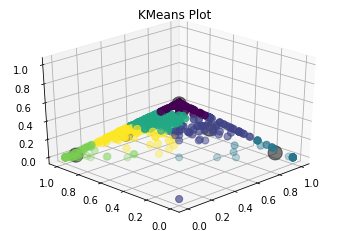

In [139]:
# %matplotlib widget
# %qt
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df3.iloc[:,0],df3.iloc[:,1],df3.iloc[:,2],c=y_means,s=50,cmap='viridis')

centres = kmeans.cluster_centers_
ax.scatter(centres[:,1],centres[:,2],centres[:,3],c='black',s=200,alpha=0.5)
ax.view_init(30, 225)


plt.title('KMeans Plot')

fig.savefig('KMeans.jpg')


In [94]:
(kmeans.cluster_centers_)

array([[-1.73472348e-18,  7.91186781e-03,  7.53311925e-03,
         9.84555013e-01],
       [ 1.36986301e-02,  3.39908122e-01,  8.84378548e-02,
         5.57955393e-01],
       [-6.50521303e-19,  8.72717384e-01,  3.60882806e-02,
         9.11943351e-02],
       [ 4.82736443e-05,  5.19058572e-02,  2.78674114e-01,
         6.69371755e-01],
       [ 4.71350714e-05,  2.52841064e-02,  9.28252577e-01,
         4.64161815e-02],
       [ 1.20398258e-07,  5.06426974e-02,  4.96897921e-01,
         4.52459261e-01]])

In [95]:
for i in kmeans.cluster_centers_:
    my_formatted_list = [ '%.4f' % elem for elem in i ]
    print(my_formatted_list)
    evict fail finish kill
    

['-0.0000', '0.0079', '0.0075', '0.9846']
['0.0137', '0.3399', '0.0884', '0.5580']
['-0.0000', '0.8727', '0.0361', '0.0912']
['0.0000', '0.0519', '0.2787', '0.6694']
['0.0000', '0.0253', '0.9283', '0.0464']
['0.0000', '0.0506', '0.4969', '0.4525']


In [96]:
cluster_user_map = {}
for i in cluster_index_map.keys():
    cluster_user_map[i] = list(np.unique(df.iloc[cluster_index_map[i]][0]))

In [97]:
cluster_user_map

{0: ['+3JB3kdkUWPSK/CxL2eTwBJ+2emDAp9S+1URmz7bH2E=',
  '+Af/i5ZErwztHIZu1WncL3sjY6IP9qyJNINnOsleT0Y=',
  '+BW2jvyXVN9T37gC63oaM8+kpVC5ZtzzPvx5CnygmmY=',
  '+ENeFB0lOVM//Cb4Jl0AY6TiNoKa1ziTUY9PrN23hos=',
  '+I3+x4vd6Y687bNrFXR1hSJ4+1SQGBGw1eixBd/TPEk=',
  '+LSGdEqMvoRv2C0Gj1MK/k2Pzz70oCg1SFUZXkIXqI4=',
  '+LSdepXha5sxIM4HrbKYSWX7+ow4rjmfmI6YzE/QbpQ=',
  '+OUmAt8SDPVnr20aqYZRt0DQdAAddxrTz4UnFkQnsAI=',
  '+YtefvB6dPk+AK3hu/xkBcvpWM8hMCLpBbxVzA5YG58=',
  '+cz+wEXttqDjld+YWLmrgqExjdqiHMZ2WZODThyR9jE=',
  '+iApys7Av1vwVILsGwqHlAML+SPG8Ar78lvVv1Yr15E=',
  '+iyX5HUcQOQV5mUASrNLoNQJlMbHRmriS33GBzFYzNE=',
  '/7nOKrsKf4bsF4i2nvCcRszsjYZ+0UOZGgYr5d8DtWg=',
  '/9lxytyTIlevbcIIgYhqx45HsxZkNQ4OU0WmhZzuD4s=',
  '/ADqb6ab3/Bxrz3dyZaDPRX7DAfUdiR+JTSVDrtJ+qU=',
  '/DWNzLUYt1b87cIWYd0vW5P9iNmPH8XdJVuqbOl+e4o=',
  '/JPjGJsViMDVuuWGXP+2oCOBH8amZF25EbYGbWnM6l0=',
  '/Um7Ri16EB928aRDo/a+uNDQG95oYvWjDKp4HUJ+xJU=',
  '/fKjwmHNKsivHULxcv1kE6weSve/Qn/SLa2e2p83Vlk=',
  '/iRhTQj0EaxL4qQnfJmIFrT/7BXw5D9kMnzdHfHBkCY=

In [100]:
print(task_event.columns)
print(len(task_event))

Index(['CPU request', 'Unnamed: 0', 'different machines restriction',
       'disk space request', 'event type', 'job ID', 'machine ID',
       'memory request', 'missing info', 'priority', 'scheduling class',
       'task index', 'timestamp', 'user'],
      dtype='object')
200012541


In [3]:
task_event=pd.read_csv('/home/ubuntu/merged_files/merged_task_events.csv')

In [101]:
cluster_stats = []
for i in cluster_user_map.keys():
    n_users = len(cluster_user_map[i])
    s1 = task_event.loc[task_event['user'].isin(cluster_user_map[i])]
    cpu_mean = np.mean(s1['CPU request'])
    disk_mean = np.mean(s1['disk space request'])
    memory_mean = np.mean(s1['memory request'])
    total_jobs=len(np.unique(s1['job ID']))
    tasks_per_job=len(s1)/total_jobs
    cluster_stats.append([i,n_users,cpu_mean,disk_mean,memory_mean,total_jobs,tasks_per_job])

In [102]:
#Convert List to Dataframe
cluster_stats_df = pd.DataFrame.from_records(cluster_stats)

In [103]:
cluster_stats

[[0,
  264,
  0.027703901775936183,
  0.0003655615001615691,
  0.02220224880650335,
  11590,
  3991.468075927524],
 [1,
  73,
  0.024839009096506482,
  0.00033655426461452217,
  0.036076090679397974,
  2617,
  2511.394344669469],
 [2,
  41,
  0.028394806595447474,
  0.0004287125629226288,
  0.020114730884980087,
  1349,
  1042.2357301704967],
 [3,
  144,
  0.028879092714944897,
  0.0003703638447125661,
  0.0282913377960104,
  212570,
  386.6486569130169],
 [4,
  73,
  0.02398561600838599,
  0.00023106371942375299,
  0.02022243764675633,
  172554,
  20.614729302131508],
 [5,
  107,
  0.03427898229223709,
  0.000327599015389826,
  0.02660948761502526,
  270766,
  184.1554700368584]]

In [104]:
cluster_stats_df  

,0,1,2,3,4,5,6
0,0,264,0.027704,0.000366,0.022202,11590,3991.468076
1,1,73,0.024839,0.000337,0.036076,2617,2511.394345
2,2,41,0.028395,0.000429,0.020115,1349,1042.235730
3,3,144,0.028879,0.000370,0.028291,212570,386.648657
4,4,73,0.023986,0.000231,0.020222,172554,20.614729
5,5,107,0.034279,0.000328,0.026609,270766,184.155470


In [105]:
cluster_stats_df.columns=['Cluster_Id','Total Users','CPU','DISK','MEMORY','JOBS','Task/Job']

In [106]:
cluster_stats_df

,Cluster_Id,Total Users,CPU,DISK,MEMORY,JOBS,Task/Job
0,0,264,0.027704,0.000366,0.022202,11590,3991.468076
1,1,73,0.024839,0.000337,0.036076,2617,2511.394345
2,2,41,0.028395,0.000429,0.020115,1349,1042.235730
3,3,144,0.028879,0.000370,0.028291,212570,386.648657
4,4,73,0.023986,0.000231,0.020222,172554,20.614729
5,5,107,0.034279,0.000328,0.026609,270766,184.155470


In [107]:
task_usage=pd.read_csv('/home/ubuntu/task_usage/part-00010-of-00500.csv')

In [2]:
task_event=pd.read_csv('/home/ubuntu/merged_files/merged_task_events.csv')
task_event.columns

Index(['CPU request', 'Unnamed: 0', 'different machines restriction',
       'disk space request', 'event type', 'job ID', 'machine ID',
       'memory request', 'missing info', 'priority', 'scheduling class',
       'task index', 'timestamp', 'user'],
      dtype='object')

In [108]:
len(task_event)

200012541

In [109]:
X = task_event.iloc[0:2000000,[0,3,7]].values
y = task_event.iloc[0:2000000,4].values

In [110]:
#X = X[:, 1:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [111]:
import numpy as np
from sklearn import linear_model
clf = linear_model.SGDClassifier(max_iter=5000, tol=1e-5)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=1e-05,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [112]:
y_pred = clf.predict(X_test)

In [115]:
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#### Maximum no of resubmissions ####

In [117]:
#task_event1 = task_event.iloc[0:1000000,:]
task_event1 = task_event.loc[task_event['event type'].isin([2])]
task_event2 = task_event.loc[task_event['event type'].isin([3])]
task_event3 = task_event.loc[task_event['event type'].isin([4])]
task_event4 = task_event.loc[task_event['event type'].isin([5])]

In [118]:
a = task_event1.groupby(['job ID','task index'])['task index'].count()
b = task_event2.groupby(['job ID','task index'])['task index'].count()
c = task_event3.groupby(['job ID','task index'])['task index'].count()
d = task_event4.groupby(['job ID','task index'])['task index'].count()

In [119]:
from collections import Counter
print(a)

job ID      task index
6933047     0              1
7053513     2              1
28185708    0             43
            1             39
            2             24
            3             21
            4             16
            5             33
            6             27
            7             33
            8             16
            9             24
            10            27
86753913    1              2
154376113   0              2
182939990   0              1
            2              1
192299653   1              1
            5              1
            7              1
            8              1
            9              2
            10             1
            14             1
            19             1
            20             2
            24             2
            28             1
            30             1
            32             1
                          ..
6486066055  122            1
            414            1
6486087531  63      

In [120]:
a.to_csv('job_restarted.csv')
b.to_csv('job_restarted1.csv')
c.to_csv('job_restarted2.csv')
d.to_csv('job_restarted3.csv')

In [121]:
a1= pd.read_csv('job_restarted.csv', header=None,names=('Job Id','Task Index','Count'))
print(a1)
b1= pd.read_csv('job_restarted1.csv', header=None,names=('Job Id','Task Index','Count'))
c1= pd.read_csv('job_restarted2.csv', header=None,names=('Job Id','Task Index','Count'))
d1= pd.read_csv('job_restarted3.csv', header=None,names=('Job Id','Task Index','Count'))

             Job Id  Task Index  Count
0           6933047           0      1
1           7053513           2      1
2          28185708           0     43
3          28185708           1     39
4          28185708           2     24
5          28185708           3     21
6          28185708           4     16
7          28185708           5     33
8          28185708           6     27
9          28185708           7     33
10         28185708           8     16
11         28185708           9     24
12         28185708          10     27
13         86753913           1      2
14        154376113           0      2
15        182939990           0      1
16        182939990           2      1
17        192299653           1      1
18        192299653           5      1
19        192299653           7      1
20        192299653           8      1
21        192299653           9      2
22        192299653          10      1
23        192299653          14      1
24        192299653      

In [8]:
from sklearn import preprocessing
normalized_X = preprocessing.normalize([b])
print(normalized_X)
print(max(b))

[[3.00291708e-05 2.00194472e-05 1.00097236e-05 ... 2.00194472e-05
  2.00194472e-05 2.00194472e-05]]
55168


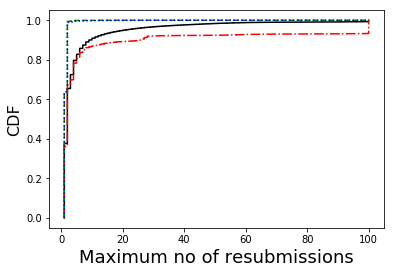

In [181]:
import numpy as np
#from pylab import *

import matplotlib.pyplot as plt
fig = plt.figure()

def cdf(data):
    n = len(data)
    x = np.sort(data) # sort your data
    y = np.arange(1, n + 1) / n # calculate cumulative probability
    return x, y

# a1 = preprocessing.normalize([a])
# b1 = preprocessing.normalize([b])
# c1 = preprocessing.normalize([c])
# d1 = preprocessing.normalize([d])

a1 = np.clip(a, 0, 100)
b1 = np.clip(b, 0, 100)
c1 = np.clip(c, 0, 100)
d1 = np.clip(d, 0, 100)
x_data1, y_data1 = cdf(list(a1))
x_data2, y_data2 = cdf(list(b1))
x_data3, y_data3 = cdf(list(c1))
x_data4, y_data4 = cdf(list(d1))

plt.plot(x_data1, y_data1,linestyle='-',color='black')
plt.plot(x_data2, y_data2,linestyle='-.',color='red')
plt.plot(x_data3, y_data3,linestyle='--',color='green')
plt.plot(x_data4, y_data4,linestyle=':',color='blue')
#fig.suptitle('Maximum no of resubmissions', fontsize=20)
plt.xlabel('Maximum no of resubmissions', fontsize=18)
plt.ylabel('CDF', fontsize=16)
fig.savefig('resubmissions.jpg')


In [167]:
##########Scheduling class#############
subset = task_event.loc[task_event['event type'].isin([3,4,5])]
e = subset.groupby(['scheduling class','event type'])['event type'].count().reset_index(name="count")
print(e)

    scheduling class  event type     count
0                  0           3  17663446
1                  0           4  20786860
2                  0           5   8958548
3                  1           3   1920240
4                  1           4   3754289
5                  1           5    946784
6                  2           3    459106
7                  2           4    234134
8                  2           5   3985203
9                  3           3    177286
10                 3           4        78
11                 3           5    134411


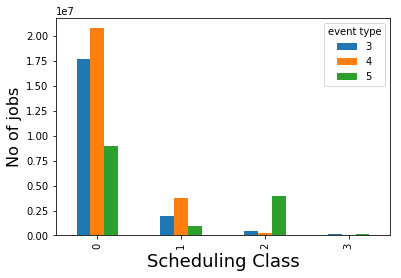

<Figure size 432x288 with 0 Axes>

In [185]:
import pylab
from pylab import figure, axes, pie, title, show
e.pivot(index='scheduling class', columns='event type', values='count').plot(kind='bar')

plt.xlabel('Scheduling Class', fontsize=18)
plt.ylabel('No of jobs', fontsize=16)
fig = plt.figure()
pylab.savefig('foo.png')

In [132]:
############# eviction priority ###############
subset2 = task_event.loc[task_event['event type'] == 2]
f = subset2.groupby(['event type','priority'])['priority'].count().reset_index(name="count")
print(f)

   event type  priority    count
0           2         0  7067320
1           2         1   603694
2           2         2    62827
3           2         3      194
4           2         4    59035
5           2         6      589
6           2         8     4154
7           2         9    22671
8           2        10      670


In [133]:
f2 = (subset2.groupby(['event type','priority'])['priority'].size()/subset2['priority'].count())*100
print(f)

   event type  priority    count
0           2         0  7067320
1           2         1   603694
2           2         2    62827
3           2         3      194
4           2         4    59035
5           2         6      589
6           2         8     4154
7           2         9    22671
8           2        10      670


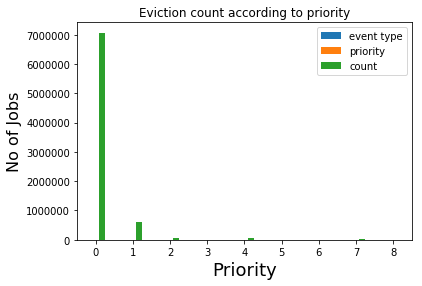

In [186]:
f.plot.bar(rot=0, subplots=False)
plt.xlabel('Priority', fontsize=18)
plt.ylabel('No of Jobs', fontsize=16)
fig.suptitle('Eviction count according to priority', fontsize=20)
plt.title('Eviction count according to priority')
fig.savefig('Eviction .jpg')

Text(0.5, 1.0, 'Eviction percentage according to priority')

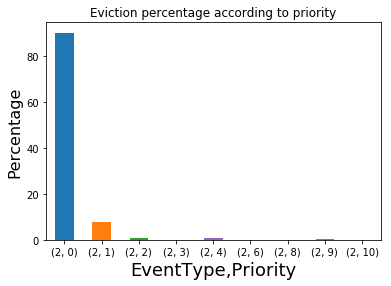

In [141]:
f2.plot.bar(rot=0, subplots=False)
plt.xlabel('EventType,Priority', fontsize=18)
plt.ylabel('Percentage', fontsize=16)
fig.savefig('Eviction percentage according to priority.jpg')
plt.title('Eviction percentage according to priority')

In [143]:
############# eviction priority ###############
subset3 = task_event.loc[task_event['event type'] == 3]
f3 = subset3.groupby(['event type','priority'])['priority'].count().reset_index(name="count")
print(f3)

   event type  priority     count
0           3         0  16413052
1           3         1    931721
2           3         2     36153
3           3         3         1
4           3         4    896380
5           3         6     72537
6           3         8     23506
7           3         9   1816770
8           3        10     29958


In [144]:
f4 = (subset3.groupby(['event type','priority'])['priority'].size()/subset3['priority'].count())*100
print(f4)

event type  priority
3           0           81.172051
            1            4.607900
            2            0.178798
            3            0.000005
            4            4.433118
            6            0.358737
            8            0.116251
            9            8.984980
            10           0.148160
Name: priority, dtype: float64


Text(0.5, 1.0, 'Failed percentage according to priority')

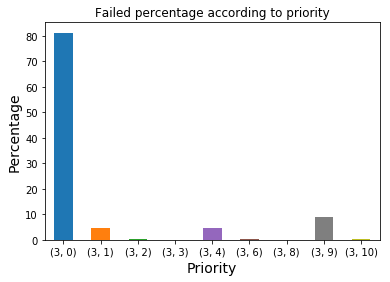

In [145]:
f4.plot.bar(rot=0, subplots=False)
plt.xlabel('Priority', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
fig.savefig('Failed percentage according to priority.jpg')
plt.title('Failed percentage according to priority')

event type  priority
4           0           20.329795
            1            8.750662
            2            5.299870
            3            0.006083
            4           61.922977
            5            0.000545
            6            2.778579
            8            0.636213
            9            0.275278
Name: priority, dtype: float64


Text(0.5, 1.0, 'Finished percentage according to priority')

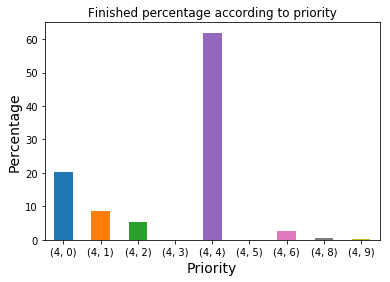

In [146]:
############# eviction priority ###############
subset4 = task_event.loc[task_event['event type'] == 4]
f5 = subset4.groupby(['event type','priority'])['priority'].count().reset_index(name="count")

f5 = (subset4.groupby(['event type','priority'])['priority'].size()/subset4['priority'].count())*100
print(f5)
f5.plot.bar(rot=0, subplots=False)
plt.xlabel('Priority', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
fig.savefig('Finished percentage according to priority.jpg')
plt.title('Finished percentage according to priority')

event type  priority
5           0           29.338588
            1            5.058889
            2            0.884124
            3            0.000367
            4           18.518939
            6            0.731166
            7            0.004202
            8            0.763028
            9            1.247025
            10           0.051479
            11           0.010636
Name: priority, dtype: float64


Text(0.5, 1.0, 'Killed percentage according to priority')

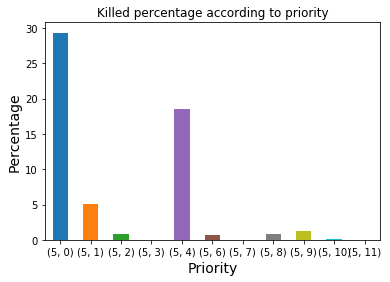

In [147]:
############# eviction priority ###############
subset5 = task_event.loc[task_event['event type'] == 5]
f6 = subset5.groupby(['event type','priority'])['priority'].count().reset_index(name="count")

f6 = (subset5.groupby(['event type','priority'])['priority'].size()/subset4['priority'].count())*100
print(f6)
f6.plot.bar(rot=0, subplots=False)
plt.xlabel('Priority', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
fig.savefig('Killed percentage according to priority.jpg')
plt.title('Killed percentage according to priority')

In [ ]:
#### Distribution of duration of failed, finished and killed jobs  ####

In [148]:
task_usage=pd.read_csv('/home/ubuntu/task_usage/part-00010-of-00500.csv')

In [149]:
task_usage.columns


Index(['Unnamed: 0', 'start timestamp', 'end timestamp', 'job ID',
       'task index', 'machine ID', 'CPU rate', 'canonical memory usage',
       'assigned memory usage', 'unmapped page cache', 'total page cache',
       'maximum memory usage', 'disk I/O time', 'local disk space usage',
       'maximum CPU rate', 'maximum disk IO time', 'cycles per instruction',
       'memory accesses per instruction', 'sample portion', 'aggregation type',
       'sampled CPU usage'],
      dtype='object')

In [150]:
usage_df = task_usage["end timestamp"] - task_usage["start timestamp"]

In [151]:
print(usage_df)

0          288000000
1          288000000
2          288000000
3            1000000
4          266000000
5          288000000
6           24000000
7          288000000
8          288000000
9          288000000
10         281000000
11         186000000
12          85000000
13         280000000
14          13000000
15           1000000
16           1000000
17           1000000
18         288000000
19         288000000
20         288000000
21         288000000
22         288000000
23         288000000
24         288000000
25         288000000
26         288000000
27         288000000
28         288000000
29         288000000
             ...    
2494288     13000000
2494289      1000000
2494290      1000000
2494291      1000000
2494292      1000000
2494293      1000000
2494294     78000000
2494295     77000000
2494296     77000000
2494297      1000000
2494298     77000000
2494299     77000000
2494300     77000000
2494301     77000000
2494302     77000000
2494303     77000000
2494304     7

In [152]:
task_us1 = task_usage.iloc[0:100000,:]

In [153]:
ts1=task_event.drop_duplicates(['job ID','task index'],keep= 'last')


In [187]:
task_us1['event type'] = 1
for index, row in task_us1.iterrows():
    a = ts1.loc[(ts1['job ID'] == row['job ID']) & (ts1['task index'] == row['task index'])]['event type']
    
    
    task_us1.set_value(index,'event type', int(a))
    # row['event type'] = int(a)
    #print(int(a))

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


KeyboardInterrupt: 

In [190]:
task_us1['time diff'] = ((task_us1['end timestamp'] - task_us1['start timestamp'])*10e-6) / 3600

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [191]:
z=(task_us1.loc[task_us1['event type'] == 5]['time diff'])
z1=task_us1.loc[task_us1['event type'] == 4]['time diff']
z2=task_us1.loc[task_us1['event type'] == 3]['time diff']
print(z)

3        0.002778
27       0.800000
31       0.800000
36       0.797222
37       0.002778
61       0.797222
62       0.797222
65       0.002778
72       0.794444
75       0.002778
76       0.063889
106      0.794444
129      0.794444
134      0.002778
140      0.002778
141      0.791667
171      0.313889
172      0.788889
174      0.788889
175      0.002778
176      0.788889
181      0.788889
209      0.788889
214      0.002778
216      0.786111
244      0.786111
249      0.002778
251      0.002778
279      0.783333
282      0.002778
           ...   
66714    0.833333
66715    0.833333
66716    0.833333
66717    0.833333
66718    0.833333
66719    0.833333
66720    0.833333
66722    0.833333
66723    0.833333
66724    0.833333
66726    0.833333
66727    0.833333
66728    0.833333
66729    0.833333
66730    0.833333
66731    0.833333
66732    0.833333
66733    0.833333
66734    0.833333
66735    0.833333
66736    0.833333
66737    0.833333
66738    0.833333
66739    0.833333
66740    0

In [192]:
print(np.mean(task_us1.loc[task_us1['event type'] == 5]['time diff']))

0.6269612776460047


In [193]:
print(np.mean(task_us1.loc[task_us1['event type'] == 4]['time diff']))

0.13645092362834232


In [194]:
print(np.mean(task_us1.loc[task_us1['event type'] == 3]['time diff']))

0.8333333333333335


In [189]:
task_us1

,Unnamed: 0,start timestamp,end timestamp,job ID,task index,machine ID,CPU rate,canonical memory usage,assigned memory usage,unmapped page cache,...,disk I/O time,local disk space usage,maximum CPU rate,maximum disk IO time,cycles per instruction,memory accesses per instruction,sample portion,aggregation type,sampled CPU usage,event type
0,0,50712000000,51000000000,4969889774,47,318473412,0.040340,0.023900,0.026760,0.001476,...,1.507000e-04,5.627000e-05,0.198500,0.011930,4.2610,0.013790,0,0,0.026180,1
1,1,50712000000,51000000000,6221861800,4348,351618628,0.014310,0.012920,0.013230,0.011060,...,6.104000e-03,4.578000e-05,0.096920,0.030640,2.9850,0.006406,0,0,0.008835,1
2,2,50712000000,51000000000,6221861800,4354,351618628,0.014310,0.014130,0.014970,0.012650,...,7.683000e-03,6.485000e-05,0.078250,0.046140,2.9950,0.006559,0,0,0.004372,1
3,3,50712000000,50713000000,6221861800,4391,2497958300,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,1.287000e-04,0.000000,0.000000,2.8540,0.005988,0,0,0.000000,5
4,4,50712000000,50978000000,6238340468,1350,351634289,0.022250,0.010620,0.011490,0.000045,...,2.241000e-04,9.537000e-07,0.093990,0.006355,1.1130,0.001690,0,0,0.022310,1
5,5,50712000000,51000000000,6252901355,95,2898880161,0.002510,0.007812,0.008728,0.000199,...,1.417000e-03,0.000000e+00,0.029850,0.045230,1.9920,0.005648,0,0,0.002174,1
6,6,50712000000,50736000000,6253322190,876,295014299,0.047120,0.011000,0.012010,0.000143,...,2.163000e-03,6.676000e-06,0.096310,0.012860,4.4190,0.008136,0,0,0.033870,1
7,7,50712000000,51000000000,6253482179,2142,3720912062,0.034300,0.075930,0.077760,0.000068,...,0.000000e+00,9.537000e-07,0.060910,0.000000,0.5276,0.000165,0,0,0.042970,1
8,8,50712000000,51000000000,6253482179,2869,3720912062,0.036990,0.076050,0.077760,0.000017,...,0.000000e+00,9.537000e-07,0.062620,0.000000,0.5277,0.000166,0,0,0.044310,0
9,9,50712000000,51000000000,6254584038,321,660272,0.019560,0.033140,0.034300,0.000059,...,2.146000e-04,9.537000e-07,0.409200,0.019930,0.9651,0.000344,0,0,0.012770,4


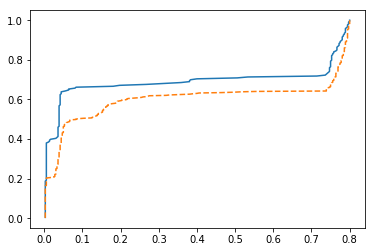

In [108]:
import numpy as np
#from pylab import *

import matplotlib.pyplot as plt


def cdf(data):
    n = len(data)
    x = np.sort(data) # sort your data
    y = np.arange(1, n + 1) / n # calculate cumulative probability
    return x, y

# a1 = preprocessing.normalize([a])
# b1 = preprocessing.normalize([b])
# c1 = preprocessing.normalize([c])
# d1 = preprocessing.normalize([d])

# a1 = np.clip(a, 0, 100)
# b1 = np.clip(b, 0, 100)
# c1 = np.clip(c, 0, 100)
# d1 = np.clip(d, 0, 100)
x_data1, y_data1 = cdf(list(z))
x_data2, y_data2 = cdf(list(z1))

# x_data2, y_data2 = cdf(list(b1))
# x_data3, y_data3 = cdf(list(c1))
# x_data4, y_data4 = cdf(list(d1))

plt.plot(x_data1, y_data1)
plt.plot(x_data2, y_data2,linestyle='--')
# plt.plot(x_data2, y_data2)
# plt.plot(x_data3, y_data3,linestyle='--')
# plt.plot(x_data4, y_data4,linestyle=':')


In [16]:
task_event.columns


Index(['CPU request', 'Unnamed: 0', 'different machines restriction',
       'disk space request', 'event type', 'job ID', 'machine ID',
       'memory request', 'missing info', 'priority', 'scheduling class',
       'task index', 'timestamp', 'user'],
      dtype='object')

In [32]:
#ts1=task_event.drop_duplicates(['job ID','task index'],keep= 'last')


In [35]:
#ts1

,CPU request,Unnamed: 0,different machines restriction,disk space request,event type,job ID,machine ID,memory request,missing info,priority,scheduling class,task index,timestamp,user
5441100,0.000000,2138,0.0,0.000000,4,6360402185,3.302598e+08,0.000155,NaN,1,0,0,1.143230e+12,F2+Gv53Pxd4KDRb/UsGECThH/XUOpcWKElUXJkhkt1c=
5444790,0.031250,5828,0.0,0.000004,4,6360403993,2.274413e+08,0.011250,NaN,4,1,0,1.143315e+12,0r3naaX+ybfsUIahb35AvYPC6MarnPhbqkAtRJor0xE=
5445166,0.012500,6204,0.0,0.000004,4,6360408277,1.301962e+06,0.000155,NaN,0,0,0,1.143325e+12,jOqcqHrLBrhAcJPUf2gm/ikKchA7pXWzCssLQqGUSOY=
5445266,0.000000,6304,0.0,0.000000,4,6360408347,9.792339e+07,0.000155,NaN,1,0,0,1.143327e+12,F2+Gv53Pxd4KDRb/UsGECThH/XUOpcWKElUXJkhkt1c=
5445744,0.000000,6782,0.0,0.000011,4,6360408306,9.295743e+08,0.004662,NaN,1,0,0,1.143333e+12,ZpQmujQYX55FcN2RFvqqUkcz5z/Tovj2FaG8sFtlG48=
5448782,0.000000,9820,0.0,0.000011,4,6360408310,9.295743e+08,0.004662,NaN,1,0,0,1.143360e+12,ZpQmujQYX55FcN2RFvqqUkcz5z/Tovj2FaG8sFtlG48=
5452159,0.009369,13197,0.0,0.000031,4,6360408663,6.566577e+06,0.002953,NaN,6,0,6,1.143392e+12,68CsCZngOkuQn5lVo+dNXKGoFx9ZmJXWR+W7NAUmEH4=
5452277,0.068730,13315,0.0,0.000038,4,6360400283,6.723010e+05,0.047730,NaN,4,0,0,1.143394e+12,r/Al6kYJOwZITr6wi4pAlEwyGv5TM2EkJ8woA5hszeA=
5452334,0.068730,13372,0.0,0.000038,4,6360400283,3.677161e+09,0.047730,NaN,4,0,9,1.143395e+12,r/Al6kYJOwZITr6wi4pAlEwyGv5TM2EkJ8woA5hszeA=
5452337,0.068730,13375,0.0,0.000038,4,6360400283,4.802911e+09,0.047730,NaN,4,0,14,1.143395e+12,r/Al6kYJOwZITr6wi4pAlEwyGv5TM2EkJ8woA5hszeA=


In [199]:
task_us1

,Unnamed: 0,start timestamp,end timestamp,job ID,task index,machine ID,CPU rate,canonical memory usage,assigned memory usage,unmapped page cache,...,local disk space usage,maximum CPU rate,maximum disk IO time,cycles per instruction,memory accesses per instruction,sample portion,aggregation type,sampled CPU usage,event type,time diff
0,0,50712000000,51000000000,4969889774,47,318473412,0.040340,0.023900,0.026760,0.001476,...,5.627000e-05,0.198500,0.011930,4.2610,0.013790,0,0,0.026180,1,0.800000
1,1,50712000000,51000000000,6221861800,4348,351618628,0.014310,0.012920,0.013230,0.011060,...,4.578000e-05,0.096920,0.030640,2.9850,0.006406,0,0,0.008835,1,0.800000
2,2,50712000000,51000000000,6221861800,4354,351618628,0.014310,0.014130,0.014970,0.012650,...,6.485000e-05,0.078250,0.046140,2.9950,0.006559,0,0,0.004372,1,0.800000
3,3,50712000000,50713000000,6221861800,4391,2497958300,0.000000,0.000000,0.000000,0.000000,...,1.287000e-04,0.000000,0.000000,2.8540,0.005988,0,0,0.000000,5,0.002778
4,4,50712000000,50978000000,6238340468,1350,351634289,0.022250,0.010620,0.011490,0.000045,...,9.537000e-07,0.093990,0.006355,1.1130,0.001690,0,0,0.022310,1,0.738889
5,5,50712000000,51000000000,6252901355,95,2898880161,0.002510,0.007812,0.008728,0.000199,...,0.000000e+00,0.029850,0.045230,1.9920,0.005648,0,0,0.002174,1,0.800000
6,6,50712000000,50736000000,6253322190,876,295014299,0.047120,0.011000,0.012010,0.000143,...,6.676000e-06,0.096310,0.012860,4.4190,0.008136,0,0,0.033870,1,0.066667
7,7,50712000000,51000000000,6253482179,2142,3720912062,0.034300,0.075930,0.077760,0.000068,...,9.537000e-07,0.060910,0.000000,0.5276,0.000165,0,0,0.042970,1,0.800000
8,8,50712000000,51000000000,6253482179,2869,3720912062,0.036990,0.076050,0.077760,0.000017,...,9.537000e-07,0.062620,0.000000,0.5277,0.000166,0,0,0.044310,0,0.800000
9,9,50712000000,51000000000,6254584038,321,660272,0.019560,0.033140,0.034300,0.000059,...,9.537000e-07,0.409200,0.019930,0.9651,0.000344,0,0,0.012770,4,0.800000


In [200]:
max_failed_time=(task_us1.loc[task_us1['event type'] == 4])


In [201]:
max_failed_time


,Unnamed: 0,start timestamp,end timestamp,job ID,task index,machine ID,CPU rate,canonical memory usage,assigned memory usage,unmapped page cache,...,local disk space usage,maximum CPU rate,maximum disk IO time,cycles per instruction,memory accesses per instruction,sample portion,aggregation type,sampled CPU usage,event type,time diff
9,9,50712000000,51000000000,6254584038,321,660272,0.019560,0.033140,0.034300,5.913000e-05,...,9.537000e-07,0.409200,0.019930,0.9651,0.000344,0,0,0.012770,4,0.800000
10,10,50712000000,50993000000,6254584038,331,351613851,0.017400,0.033750,0.035030,1.717000e-05,...,9.537000e-07,0.066040,0.005211,0.9996,0.000489,0,0,0.062190,4,0.780556
11,11,50712000000,50898000000,6254584038,492,6566576,0.008118,0.032290,0.033330,1.183000e-04,...,9.537000e-07,0.062740,0.049990,0.9872,0.000257,0,0,0.000232,4,0.516667
14,14,50712000000,50725000000,6254775209,62,317495549,0.000162,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.002110,0.000000,NaN,NaN,0,0,0.000000,4,0.036111
15,15,50712000000,50713000000,6254822775,307,6648755,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,2.9340,0.007882,0,0,0.000000,4,0.002778
16,16,50712000000,50713000000,6254822775,1180,351652722,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,4.7600,0.017700,0,0,0.000000,4,0.002778
17,17,50712000000,50713000000,6254822775,1728,16917224,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,5.1980,0.020460,0,0,0.000000,4,0.002778
18,18,50712000000,51000000000,6254869357,1956,4820220492,0.056760,0.017090,0.018370,2.775000e-04,...,3.815000e-06,0.186500,0.042180,1.8200,NaN,0,0,0.053590,4,0.800000
19,19,50712000000,51000000000,6254869357,2135,3305969870,0.050720,0.017910,0.019440,3.204000e-04,...,3.815000e-06,0.157500,0.027860,1.1030,0.001210,0,0,0.072390,4,0.800000
20,20,50712000000,51000000000,6254869357,4880,6955745,0.069460,0.019930,0.021390,3.595000e-04,...,3.815000e-06,0.199500,0.056090,1.5300,0.002456,0,0,0.073730,4,0.800000


In [202]:
max_failed_time.loc[max_failed_time['time diff'].idxmax()]

Unnamed: 0                         9.000000e+00
start timestamp                    5.071200e+10
end timestamp                      5.100000e+10
job ID                             6.254584e+09
task index                         3.210000e+02
machine ID                         6.602720e+05
CPU rate                           1.956000e-02
canonical memory usage             3.314000e-02
assigned memory usage              3.430000e-02
unmapped page cache                5.913000e-05
total page cache                   1.307000e-04
maximum memory usage               3.503000e-02
disk I/O time                      2.146000e-04
local disk space usage             9.537000e-07
maximum CPU rate                   4.092000e-01
maximum disk IO time               1.993000e-02
cycles per instruction             9.651000e-01
memory accesses per instruction    3.444000e-04
sample portion                     0.000000e+00
aggregation type                   0.000000e+00
sampled CPU usage                  1.277

In [203]:
max_failed_time=max(task_us1.loc[task_us1['event type'] == 4]['time diff'])
max_failed_time

0.8000000000000002

In [221]:
majority_job_time= len(task_us1.loc[task_us1['time diff'] < 0.3])
majority_job_time

6167

In [215]:
machine_lifecycle=pd.read_csv('/home/ubuntu/machine_events/part-00000-of-00001.csv',names=['timestamp','machine ID','event type','platform ID','cpu','memory'])

In [ ]:
#### Single task(Short, Medium, Long) Batch Free Production Jobs

In [222]:
task_usage.columns

Index(['Unnamed: 0', 'start timestamp', 'end timestamp', 'job ID',
       'task index', 'machine ID', 'CPU rate', 'canonical memory usage',
       'assigned memory usage', 'unmapped page cache', 'total page cache',
       'maximum memory usage', 'disk I/O time', 'local disk space usage',
       'maximum CPU rate', 'maximum disk IO time', 'cycles per instruction',
       'memory accesses per instruction', 'sample portion', 'aggregation type',
       'sampled CPU usage'],
      dtype='object')

In [223]:
task_usag1=np.unique(task_usage['job ID'])

In [224]:
len(task_usag1)

5015

In [226]:
task_event_subset = task_event.loc[task_event['job ID'].isin(task_usag1)]

In [227]:
print(len(task_event), len(task_event_subset))

200012541 30365632


In [228]:
task_event_subset.drop_duplicates(subset=['job ID','task index'], keep="last")

,CPU request,Unnamed: 0,different machines restriction,disk space request,event type,job ID,machine ID,memory request,missing info,priority,scheduling class,task index,timestamp,user
9431570,0.006248,167883,0.0,0.000038,5,5495696991,1.436293e+09,0.023860,NaN,0,0,3,1.874969e+11,yJ9xqe3+iO6kAPKtwDfI5pyvNMRG0co5oY+kseN+qx8=
61397352,0.027950,84209,0.0,0.000077,4,6252794983,3.174955e+08,0.027040,NaN,2,1,87,1.930505e+10,nHinWYr2Nep8Mr79MMvmYCrGb0NdshyX6mlnZo/Ot+I=
61397357,0.027950,84214,0.0,0.000077,4,6252794983,2.573372e+08,0.027040,NaN,2,1,98,1.930642e+10,nHinWYr2Nep8Mr79MMvmYCrGb0NdshyX6mlnZo/Ot+I=
61397396,0.027950,84253,0.0,0.000077,4,6252794983,2.573371e+08,0.027040,NaN,2,1,92,1.931178e+10,nHinWYr2Nep8Mr79MMvmYCrGb0NdshyX6mlnZo/Ot+I=
61397420,0.027950,84277,0.0,0.000077,4,6252794983,2.178338e+08,0.027040,NaN,2,1,47,1.931245e+10,nHinWYr2Nep8Mr79MMvmYCrGb0NdshyX6mlnZo/Ot+I=
61397421,0.027950,84278,0.0,0.000077,4,6252794983,2.568167e+09,0.027040,NaN,2,1,30,1.931246e+10,nHinWYr2Nep8Mr79MMvmYCrGb0NdshyX6mlnZo/Ot+I=
61397423,0.027950,84280,0.0,0.000077,4,6252794983,4.820215e+09,0.027040,NaN,2,1,97,1.931355e+10,nHinWYr2Nep8Mr79MMvmYCrGb0NdshyX6mlnZo/Ot+I=
61397424,0.027950,84281,0.0,0.000077,4,6252794983,4.820236e+09,0.027040,NaN,2,1,80,1.931355e+10,nHinWYr2Nep8Mr79MMvmYCrGb0NdshyX6mlnZo/Ot+I=
61397436,0.027950,84293,0.0,0.000077,4,6252794983,4.820319e+09,0.027040,NaN,2,1,17,1.931491e+10,nHinWYr2Nep8Mr79MMvmYCrGb0NdshyX6mlnZo/Ot+I=
61397454,0.027950,84311,0.0,0.000077,4,6252794983,1.438285e+09,0.027040,NaN,2,1,67,1.931646e+10,nHinWYr2Nep8Mr79MMvmYCrGb0NdshyX6mlnZo/Ot+I=


In [229]:
task_us11 = task_usage.iloc[0:50000,:]

In [230]:
task_us11['priority'] = 1
task_us11['event type'] = 1
for index, row in task_us11.iterrows():
    a = task_event_subset.loc[(task_event_subset['job ID'] == row['job ID']) & (task_event_subset['task index'] == row['task index'])].iloc[0,9]
    g = task_event_subset.loc[(task_event_subset['job ID'] == row['job ID']) & (task_event_subset['task index'] == row['task index'])].iloc[0,4]
    task_us11.set_value(index,'priority', int(a))
    task_us11.set_value(index,'event type', int(g))

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/home/ubuntu/anaconda3/lib/python3.7/site-package

In [231]:
task_event.columns

Index(['CPU request', 'Unnamed: 0', 'different machines restriction',
       'disk space request', 'event type', 'job ID', 'machine ID',
       'memory request', 'missing info', 'priority', 'scheduling class',
       'task index', 'timestamp', 'user'],
      dtype='object')

In [232]:
task_us11

,Unnamed: 0,start timestamp,end timestamp,job ID,task index,machine ID,CPU rate,canonical memory usage,assigned memory usage,unmapped page cache,...,local disk space usage,maximum CPU rate,maximum disk IO time,cycles per instruction,memory accesses per instruction,sample portion,aggregation type,sampled CPU usage,priority,event type
0,0,50712000000,51000000000,4969889774,47,318473412,0.040340,0.023900,0.026760,0.001476,...,5.627000e-05,0.19850,0.011930,4.2610,0.013790,0,0,0.026180,9,5
1,1,50712000000,51000000000,6221861800,4348,351618628,0.014310,0.012920,0.013230,0.011060,...,4.578000e-05,0.09692,0.030640,2.9850,0.006406,0,0,0.008835,0,2
2,2,50712000000,51000000000,6221861800,4354,351618628,0.014310,0.014130,0.014970,0.012650,...,6.485000e-05,0.07825,0.046140,2.9950,0.006559,0,0,0.004372,0,3
3,3,50712000000,50713000000,6221861800,4391,2497958300,0.000000,0.000000,0.000000,0.000000,...,1.287000e-04,0.00000,0.000000,2.8540,0.005988,0,0,0.000000,0,1
4,4,50712000000,50978000000,6238340468,1350,351634289,0.022250,0.010620,0.011490,0.000045,...,9.537000e-07,0.09399,0.006355,1.1130,0.001690,0,0,0.022310,0,2
5,5,50712000000,51000000000,6252901355,95,2898880161,0.002510,0.007812,0.008728,0.000199,...,0.000000e+00,0.02985,0.045230,1.9920,0.005648,0,0,0.002174,0,0
6,6,50712000000,50736000000,6253322190,876,295014299,0.047120,0.011000,0.012010,0.000143,...,6.676000e-06,0.09631,0.012860,4.4190,0.008136,0,0,0.033870,1,5
7,7,50712000000,51000000000,6253482179,2142,3720912062,0.034300,0.075930,0.077760,0.000068,...,9.537000e-07,0.06091,0.000000,0.5276,0.000165,0,0,0.042970,2,5
8,8,50712000000,51000000000,6253482179,2869,3720912062,0.036990,0.076050,0.077760,0.000017,...,9.537000e-07,0.06262,0.000000,0.5277,0.000166,0,0,0.044310,2,1
9,9,50712000000,51000000000,6254584038,321,660272,0.019560,0.033140,0.034300,0.000059,...,9.537000e-07,0.40920,0.019930,0.9651,0.000344,0,0,0.012770,2,0


In [233]:
free=(task_us11.loc[task_us11['priority'].isin(['0','1'])])
batch=(task_us11.loc[task_us11['priority'].isin(['2','3','4','5','6','7','8'])])
production=(task_us11.loc[task_us11['priority'].isin(['9'])])

In [234]:
free

,Unnamed: 0,start timestamp,end timestamp,job ID,task index,machine ID,CPU rate,canonical memory usage,assigned memory usage,unmapped page cache,...,local disk space usage,maximum CPU rate,maximum disk IO time,cycles per instruction,memory accesses per instruction,sample portion,aggregation type,sampled CPU usage,priority,event type
1,1,50712000000,51000000000,6221861800,4348,351618628,0.014310,0.012920,0.013230,0.011060,...,4.578000e-05,0.096920,0.030640,2.9850,0.006406,0,0,0.008835,0,2
2,2,50712000000,51000000000,6221861800,4354,351618628,0.014310,0.014130,0.014970,0.012650,...,6.485000e-05,0.078250,0.046140,2.9950,0.006559,0,0,0.004372,0,3
3,3,50712000000,50713000000,6221861800,4391,2497958300,0.000000,0.000000,0.000000,0.000000,...,1.287000e-04,0.000000,0.000000,2.8540,0.005988,0,0,0.000000,0,1
4,4,50712000000,50978000000,6238340468,1350,351634289,0.022250,0.010620,0.011490,0.000045,...,9.537000e-07,0.093990,0.006355,1.1130,0.001690,0,0,0.022310,0,2
5,5,50712000000,51000000000,6252901355,95,2898880161,0.002510,0.007812,0.008728,0.000199,...,0.000000e+00,0.029850,0.045230,1.9920,0.005648,0,0,0.002174,0,0
6,6,50712000000,50736000000,6253322190,876,295014299,0.047120,0.011000,0.012010,0.000143,...,6.676000e-06,0.096310,0.012860,4.4190,0.008136,0,0,0.033870,1,5
12,12,50712000000,50797000000,6254639538,1264,765536,0.038570,0.010410,0.011410,0.000195,...,2.861000e-06,0.175800,0.003429,1.3600,0.001910,0,0,0.039550,1,4
13,13,50712000000,50992000000,6254639538,1861,1439550931,0.041870,0.010390,0.011510,0.000226,...,2.861000e-06,0.094360,0.014570,1.3220,0.001736,0,0,0.053340,1,4
31,31,50712000000,51000000000,6254921251,72,1437201069,0.001945,0.001614,0.002136,0.000168,...,0.000000e+00,0.132300,0.054870,4.7240,0.016820,0,0,0.001354,0,0
32,32,50712000000,50780000000,6254921876,135,351618701,0.001465,0.001230,0.001926,0.000375,...,0.000000e+00,0.039670,0.032960,3.4770,0.011720,0,0,0.000661,0,0


In [235]:
free['timestamp_diff']=((free['end timestamp'] - free['start timestamp'])*10e-6) / 60

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [236]:
from collections import Counter
#free1=free.groupby('job ID')['job ID'].count()
#free1
free1 =Counter(free['job ID'])
d = dict((k, v) for k, v in free1.items() if v == 1)

In [237]:
free1

Counter({6221861800: 713,
         6238340468: 153,
         6252901355: 50,
         6253322190: 209,
         6254639538: 443,
         6254921251: 33,
         6254921876: 1674,
         6249834537: 70,
         6253964263: 131,
         6222327309: 21,
         5307854452: 7,
         5495697968: 7,
         6035592005: 13,
         6249832520: 32,
         6254455788: 61,
         6252358260: 1,
         6254926387: 1,
         6035592170: 4,
         6254836554: 3,
         6218406404: 15,
         6254910928: 9,
         5402488769: 4036,
         6183750753: 30,
         6219557576: 8,
         5494054149: 304,
         5567180387: 43,
         6231698371: 14,
         5822896270: 17,
         6217659576: 5,
         6254511371: 4,
         6254926568: 3,
         5966089485: 12,
         6117800987: 4,
         6254788197: 14,
         6254926893: 5,
         5003132532: 3,
         6231386586: 2,
         4717069784: 10,
         6254927725: 10,
         6254927723: 4,
      

In [238]:
d

{6252358260: 1,
 6254926387: 1,
 6254928887: 1,
 6254929630: 1,
 6254365051: 1,
 6254788791: 1,
 6254932525: 1,
 6164869082: 1,
 6254933834: 1,
 6254499647: 1,
 6035591679: 1,
 6254935755: 1,
 6254936206: 1,
 5770157605: 1,
 5772896727: 1,
 194963094: 1,
 296756903: 1,
 358933853: 1,
 358933855: 1,
 498778363: 1,
 532613684: 1,
 595842024: 1,
 609252510: 1,
 609252512: 1,
 609252514: 1,
 609252516: 1,
 837840133: 1,
 1161381522: 1,
 1170482497: 1,
 1332939103: 1,
 1488089419: 1,
 1776505648: 1,
 1862501286: 1,
 1968086762: 1,
 1971328329: 1,
 1992404130: 1,
 2025898332: 1,
 2035852486: 1,
 2120383885: 1,
 2226478153: 1,
 2274380521: 1,
 2355555091: 1,
 2440955189: 1,
 2943344645: 1,
 2943345853: 1,
 3008128175: 1,
 3086091356: 1,
 3086091420: 1,
 3086091435: 1,
 3086091451: 1,
 3137534811: 1,
 3208447095: 1,
 3226024692: 1,
 3336097381: 1,
 3350267310: 1,
 3355016124: 1,
 3461629288: 1,
 3461671900: 1,
 3461704815: 1,
 3461750771: 1,
 3461765058: 1,
 3461769675: 1,
 3461786521: 1,
 346

In [263]:
list(d.keys())

[6252358260,
 6254926387,
 6254928887,
 6254929630,
 6254365051,
 6254788791,
 6254932525,
 6164869082,
 6254933834,
 6254499647,
 6035591679,
 6254935755,
 6254936206,
 5770157605,
 5772896727,
 194963094,
 296756903,
 358933853,
 358933855,
 498778363,
 532613684,
 595842024,
 609252510,
 609252512,
 609252514,
 609252516,
 837840133,
 1161381522,
 1170482497,
 1332939103,
 1488089419,
 1776505648,
 1862501286,
 1968086762,
 1971328329,
 1992404130,
 2025898332,
 2035852486,
 2120383885,
 2226478153,
 2274380521,
 2355555091,
 2440955189,
 2943344645,
 2943345853,
 3008128175,
 3086091356,
 3086091420,
 3086091435,
 3086091451,
 3137534811,
 3208447095,
 3226024692,
 3336097381,
 3350267310,
 3355016124,
 3461629288,
 3461671900,
 3461704815,
 3461750771,
 3461765058,
 3461769675,
 3461786521,
 3461787972,
 3466058276,
 3477177120,
 3478528503,
 3507432212,
 3507457183,
 3508950175,
 3520037794,
 3520037933,
 3527819762,
 3527823389,
 3543030441,
 3543033703,
 3606222828,
 3638783942

In [264]:
free1=free.loc[free['job ID'].isin(list(d.keys()))]

In [265]:
free1

,Unnamed: 0,start timestamp,end timestamp,job ID,task index,machine ID,CPU rate,canonical memory usage,assigned memory usage,unmapped page cache,...,maximum CPU rate,maximum disk IO time,cycles per instruction,memory accesses per instruction,sample portion,aggregation type,sampled CPU usage,priority,event type,timestamp_diff
219,219,50717000000,51000000000,6252358260,1750,284739139,0.003113,0.011110,0.016940,0.000231,...,0.023960,0.024510,3.1290,0.008266,0,0,0.000565,1,0,47.166667
284,284,50718000000,51000000000,6254926387,0,2381645919,0.000402,0.000643,0.013600,0.000297,...,0.008942,0.052000,3.8150,0.010940,0,0,0.000302,0,0,47.000000
3029,3029,50809000000,51000000000,6254928887,0,82771193,0.000199,0.000668,0.001932,0.000295,...,0.010650,0.048400,1.8020,0.004242,0,0,0.000033,0,0,31.833333
3403,3403,50822000000,51000000000,6254929630,0,6566793,0.000202,0.000346,0.001925,0.000034,...,0.026760,0.018370,9.9960,0.039480,0,0,0.000011,0,0,29.666667
4202,4202,50844000000,51000000000,6254365051,17,3539576954,0.000326,0.000505,0.001940,0.000222,...,0.007576,0.018160,2.7750,0.008564,0,0,0.000099,0,2,26.000000
5519,5519,50894000000,51000000000,6254788791,0,5119058619,0.018770,0.022430,0.024840,0.001745,...,0.143100,0.018070,2.7810,NaN,0,0,0.024260,1,4,17.666667
5805,5805,50904000000,51000000000,6254932525,0,294492126,0.000339,0.000988,0.003174,0.000298,...,0.012410,0.049990,1.2240,0.000952,0,0,0.000033,0,0,16.000000
6241,6241,50922000000,51000000000,6164869082,0,305376846,0.000000,0.000126,0.001921,0.000018,...,0.000000,0.000000,0.8250,0.000606,0,0,0.000000,1,2,13.000000
6455,6455,50930000000,51000000000,6254933834,0,1338594,0.000398,0.000836,0.001926,0.000317,...,0.008194,0.056210,1.2340,0.000989,0,0,0.000158,0,0,11.666667
6512,6512,50933000000,51000000000,6254499647,0,56895651,0.000272,0.000737,0.003841,0.000216,...,0.000360,0.000072,4.0780,0.014660,0,0,0.000210,1,0,11.166667


In [268]:
single_task_short=free1.loc[free['timestamp_diff']<10]

In [269]:
single_task_short

,Unnamed: 0,start timestamp,end timestamp,job ID,task index,machine ID,CPU rate,canonical memory usage,assigned memory usage,unmapped page cache,...,maximum CPU rate,maximum disk IO time,cycles per instruction,memory accesses per instruction,sample portion,aggregation type,sampled CPU usage,priority,event type,timestamp_diff
7070,7070,50954000000,51000000000,6035591679,15,207833377,0.000028,0.000236,0.001911,0.000216,...,0.000100,0.000286,23.520,0.11970,0,0,0.000057,0,2,7.666667
7332,7332,50967000000,51000000000,6254935755,0,5111809840,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,0,0,0.000000,0,0,5.500000
7640,7640,50981000000,51000000000,6254936206,0,3915101447,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,0,0,0.000000,1,0,3.166667
7823,7823,50991000000,51000000000,5770157605,0,4304748811,0.000031,0.000206,0.003880,0.000002,...,0.000161,0.000000,6.638,0.02666,0,0,0.000161,0,2,1.500000
7954,7954,50996000000,51000000000,5772896727,0,1302201,0.000049,0.000217,0.003876,0.000006,...,0.000089,0.000000,34.980,0.15980,0,0,0.000046,0,2,0.666667


In [270]:
single_task_short1 =Counter(single_task_short['event type'])
single_task_short1

Counter({2: 3, 0: 2})

In [271]:
X=(np.array(list(single_task_short1.values())))
print(X)

[3 2]


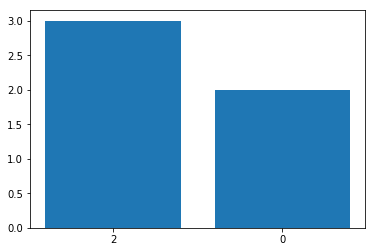

In [272]:
plt.bar(range(len(single_task_short1)), list(single_task_short1.values()), align='center')
plt.xticks(range(len(single_task_short1)), list(single_task_short1.keys()))
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.show()

In [ ]:
batch['timestamp_diff']=((batch['end timestamp'] - batch['start timestamp'])*10e-6) / 60
batch1 =Counter(batch['job ID'])
print(batch1)
d1 = dict((k, v) for k, v in batch1.items() if v == 1)
print(list(d1.keys()))
batch1=batch.loc[batch['job ID'].isin(list(d1.keys()))]
single_task_medium=batch1.loc[batch['timestamp_diff']>10]
single_task_medium1 =Counter(single_task_medium['event type'])
Y=(np.array(list(single_task_medium1.values())))
print(Y)
print(single_task_medium1)
plt.bar(range(len(single_task_medium1)), list(single_task_medium1.values()), align='center')
plt.xticks(range(len(single_task_medium1)), list(single_task_medium1.keys()))
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.show()

Counter({6254822775: 644, 4857080139: 500, 4857081234: 500, 4857082814: 500, 4952205202: 403, 5251189610: 328, 6254869357: 320, 6253482179: 286, 6254583304: 159, 6254840638: 150, 6254584038: 148, 6254920202: 104, 6254868748: 101, 6254933442: 100, 6254932417: 95, 6254933639: 95, 6253958919: 53, 6254925661: 49, 6254627852: 45, 6254925430: 43, 6254926081: 43, 6254924266: 43, 6254923920: 39, 6254775209: 36, 6254926489: 29, 6224307516: 26, 6254847176: 24, 6254822694: 23, 4916863910: 18, 6254851106: 15, 6254865598: 15, 5008466431: 15, 6254923708: 13, 6254687618: 12, 5509171942: 12, 5517058084: 12, 5425205893: 10, 5517023853: 10, 6254514665: 9, 5844213834: 8, 5425205621: 8, 6177502813: 7, 6254935493: 7, 4997315042: 6, 5542044753: 6, 4562502873: 5, 6254925536: 4, 5850685169: 4, 6254928728: 4, 6254930666: 4, 6254932513: 4, 5425205589: 4, 6254924171: 3, 6254926008: 3, 6254840595: 3, 6254840616: 3, 6254923639: 3, 6254923808: 3, 6254925171: 3, 6254272644: 3, 6177502198: 3, 6247759188: 3, 550081907

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


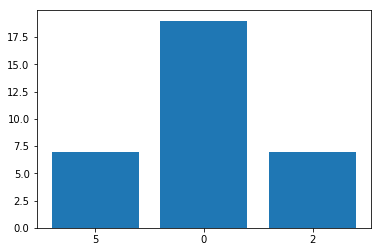

In [273]:
batch['timestamp_diff']=((batch['end timestamp'] - batch['start timestamp'])*10e-6) / 60
batch1 =Counter(batch['job ID'])
print(batch1)
d1 = dict((k, v) for k, v in batch1.items() if v == 1)
print(list(d1.keys()))
batch1=batch.loc[batch['job ID'].isin(list(d1.keys()))]
single_task_medium=batch1.loc[batch['timestamp_diff']>10]
single_task_medium1 =Counter(single_task_medium['event type'])
Y=(np.array(list(single_task_medium1.values())))
print(Y)
print(single_task_medium1)
plt.bar(range(len(single_task_medium1)), list(single_task_medium1.values()), align='center')
plt.xticks(range(len(single_task_medium1)), list(single_task_medium1.keys()))
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.show()

In [162]:
x = np.arange(2)
zero = [6,4]
two = [1,1]
three = [0,1]
print(x)

[0 1]


NameError: name 'X' is not defined

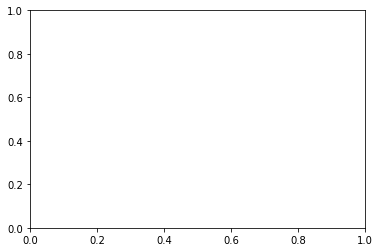

In [166]:
ax = plt.subplot(111)
#plt.bar(x-0.2, zero,width=0.2,color='b',align='center')
plt.bar(x, X,width=0.2,color='g',align='center')
plt.bar(x+0.2,Y,width=0.2,color='r',align='center')

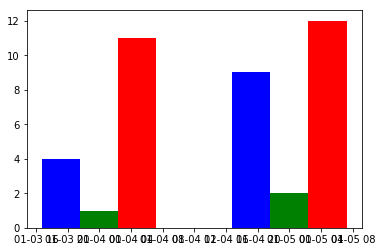

In [158]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime

x = [datetime.datetime(2011, 1, 4, 0, 0),
     datetime.datetime(2011, 1, 5, 0, 0)]
x = date2num(x)

y = [4, 9]
z=[1,2]
k=[11,12]

ax = plt.subplot(111)
ax.bar(x-0.2, y,width=0.2,color='b',align='center')
ax.bar(x, z,width=0.2,color='g',align='center')
ax.bar(x+0.2, k,width=0.2,color='r',align='center')
ax.xaxis_date()

plt.show()


In [155]:
zero = []
two = []
three = []
for i in [0]:
    zero.append(X[i])
    zero.append(Y[i])
for i in [1]:
    two.append(X[i])
    two.append(Y[i])
for i in [2]:
    three.append(X[i])
    three.append(Y[i])
    

array([734141., 734142., 734143.])

<BarContainer object of 2 artists>

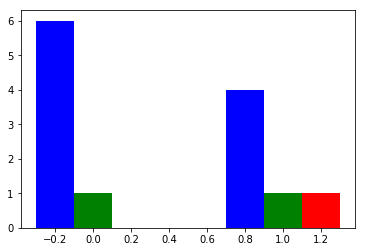

In [170]:
# as of now, At zero index, there is event type 0, At index 1 - event type 2, At index , event type -3.
ax = plt.subplot(111)
ax.bar(x-0.2, zero,width=0.2,color='b',align='center')
ax.bar(x, two,width=0.2,color='g',align='center')
ax.bar(x+0.2,three,width=0.2,color='r',align='center')

In [176]:
machine_lifecycle.columns

Index(['timestamp', 'machine ID', 'event type', 'platform ID', 'cpu',
       'memory'],
      dtype='object')

In [177]:
machine_lifecycle.groupby(['machine ID','event type'])['event type'].count()

machine ID  event type
5           0             2
            1             1
6           0             1
7           0             1
10          0             2
            1             1
13          0             2
            1             1
14          0             1
19          0             1
21          0             1
            2             3
23          0             2
            1             1
            2             2
25          0             1
            2             6
26          0             2
            1             1
            2             3
27          0             1
28          0             2
            1             1
            2             8
36          0             2
            1             1
37          0             1
38          0             1
39          0             1
41          0             1
                         ..
6391270721  0             1
            2             1
6391293459  0             1
            2            

In [180]:
machine_lifecycle.loc[machine_lifecycle['event type'].isin(['0'])]

,timestamp,machine ID,event type,platform ID,cpu,memory
0,0,5,0,HofLGzk1Or/8Ildj2+Lqv0UGGvY82NLoni8+J/Yy0RU=,0.50,0.2493
1,0,6,0,HofLGzk1Or/8Ildj2+Lqv0UGGvY82NLoni8+J/Yy0RU=,0.50,0.2493
2,0,7,0,HofLGzk1Or/8Ildj2+Lqv0UGGvY82NLoni8+J/Yy0RU=,0.50,0.2493
3,0,10,0,HofLGzk1Or/8Ildj2+Lqv0UGGvY82NLoni8+J/Yy0RU=,0.50,0.2493
4,0,13,0,HofLGzk1Or/8Ildj2+Lqv0UGGvY82NLoni8+J/Yy0RU=,0.50,0.2493
5,0,14,0,HofLGzk1Or/8Ildj2+Lqv0UGGvY82NLoni8+J/Yy0RU=,0.50,0.2493
6,0,19,0,HofLGzk1Or/8Ildj2+Lqv0UGGvY82NLoni8+J/Yy0RU=,0.50,0.2493
7,0,21,0,HofLGzk1Or/8Ildj2+Lqv0UGGvY82NLoni8+J/Yy0RU=,0.50,0.2493
8,0,23,0,HofLGzk1Or/8Ildj2+Lqv0UGGvY82NLoni8+J/Yy0RU=,0.50,0.2493
9,0,25,0,HofLGzk1Or/8Ildj2+Lqv0UGGvY82NLoni8+J/Yy0RU=,0.50,0.2493


In [225]:
sd=Counter(machine_lifecycle['machine ID'])
sd

Counter({5: 3,
         6: 1,
         7: 1,
         10: 3,
         13: 3,
         14: 1,
         19: 1,
         21: 4,
         23: 5,
         25: 7,
         26: 6,
         27: 1,
         28: 11,
         36: 3,
         37: 1,
         38: 1,
         39: 1,
         41: 13,
         43: 34,
         45: 5,
         46: 8,
         49: 9,
         52: 1,
         54: 10,
         56: 3,
         60: 7,
         61: 1,
         62: 1,
         63: 1,
         67: 16,
         68: 5,
         72: 1,
         73: 1,
         74: 1,
         75: 1,
         121306: 1,
         243096: 1,
         381113: 1,
         381126: 5,
         381128: 1,
         381129: 1,
         381133: 1,
         381139: 1,
         381227: 3,
         381233: 1,
         381234: 1,
         381235: 3,
         381236: 3,
         381352: 1,
         381361: 1,
         381364: 1,
         381365: 3,
         381368: 1,
         381369: 1,
         381370: 1,
         381371: 3,
         381374: 1

In [185]:
mach=list(Counter(machine_lifecycle['machine ID']).values())
mach

[3,
 1,
 1,
 3,
 3,
 1,
 1,
 4,
 5,
 7,
 6,
 1,
 11,
 3,
 1,
 1,
 1,
 13,
 34,
 5,
 8,
 9,
 1,
 10,
 3,
 7,
 1,
 1,
 1,
 16,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 4,
 3,
 1,
 3,
 1,
 9,
 1,
 5,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 13,
 1,
 1,
 3,
 1,
 5,
 3,
 1,
 1,
 7,
 1,
 1,
 5,
 1,
 3,
 3,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 7,
 1,
 3,
 5,
 3,
 1,
 3,
 3,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 3,
 3,
 5,
 9,
 3,
 3,
 9,
 3,
 1,
 234,
 3,
 1,
 3,
 1,
 3,
 3,
 1,
 1,
 4,
 1,
 1,
 3,
 1,
 5,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 5,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 5,
 1,
 1,
 1,
 1,
 3,
 1,
 5,
 1,
 5,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 5,
 1,
 4,
 1,
 4,
 3,
 5,
 3,
 1,


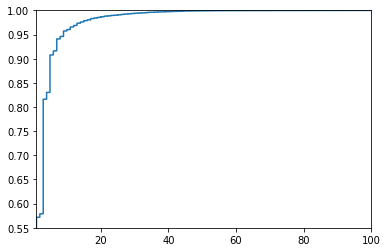

In [189]:
def cdf(data):
    n = len(data)
    x = np.sort(data) # sort your data
    y = np.arange(1, n + 1) / n # calculate cumulative probability
    return x, y

mach1 = np.clip(mach, 0, 100)

x_data1, y_data1 = cdf(list(mach1))
axes = plt.gca()
axes.set_xlim([1,100])
axes.set_ylim([0.55,1])
axes.plot(x_data1, y_data1)



In [191]:
tas_mach=task_event.loc[task_event['event type'].isin(['3','4'])]

In [250]:
a = tas_mach.groupby('machine ID')['machine ID'].count().reset_index(name='total')
b = tas_mach.loc[tas_mach['event type'] == 3].groupby('machine ID')['machine ID'].count().reset_index(name='failed')
a = a.loc[a['machine ID'].isin(b['machine ID'])]

In [251]:
q = pd.merge(b, a, on='machine ID')

In [253]:
q['ratio'] = q['failed'] / q['total']

In [258]:
q['count']=0

for index,row in q.iterrows():
    q.set_value(index,'count', int(sd[row['machine ID']]))


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [267]:
q=q.sort_values('ratio')

In [272]:
q

,machine ID,failed,total,ratio,count
9173,1.437312e+09,1,2792,0.000358,1
4514,2.078365e+08,7,501,0.013972,1
6655,3.360372e+08,2,141,0.014184,1
3697,3.206494e+07,14,880,0.015909,1
1086,1.093251e+06,174,9298,0.018714,1
2468,5.781906e+06,4,200,0.020000,1
6724,3.360476e+08,27,1225,0.022041,1
9662,2.279460e+09,5,213,0.023474,1
3712,3.208419e+07,5,210,0.023810,1
12525,6.455072e+09,12,453,0.026490,2


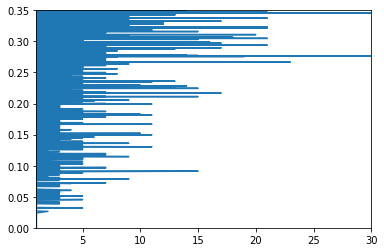

0.8501945525291829


In [269]:

axes = plt.gca()
axes.set_xlim([1,30])
axes.set_ylim([0,0.35])
plt.plot(q['count'], q['ratio'])

plt.show()
print(max(q['ratio']))

In [273]:
q1=q.groupby('count')['ratio'].mean().reset_index(name='ratio')

# 

In [274]:
q1

,count,ratio
0,1,0.406956
1,2,0.413640
2,3,0.424748
3,4,0.433116
4,5,0.439861
5,6,0.478156
6,7,0.444372
7,8,0.466732
8,9,0.455255
9,10,0.455645


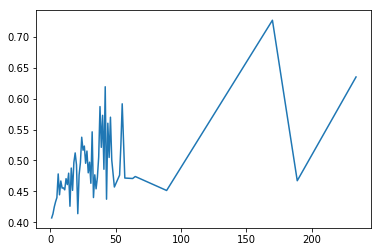

0.7270308620078042


In [276]:

axes = plt.gca()

plt.plot(q1['count'], q1['ratio'])
plt.show()
print(max(q1['ratio']))

In [5]:
mstats = pd.read_csv('/home/ubuntu/machine_events/part-00000-of-00001.csv',names=['timestamp','machine ID','event type','platform ID','cpu','memory'])


In [6]:
mstats.columns


Index(['timestamp', 'machine ID', 'event type', 'platform ID', 'cpu',
       'memory'],
      dtype='object')

In [61]:
mstats.iloc[:,3].value_counts().to_csv('stats.csv')

In [62]:
pid=pd.read_csv('stats.csv',names=['Platform _Id','count'])
s=pid['count'].sum()
pid['Percentage']=pid['count']/s

mstats.iloc[:,2].value_counts().to_csv('stats1.csv')
pid1=pd.read_csv('stats1.csv',names=['Event Type','count'])
s1=pid1['count'].sum()
pid1['Percentage']=pid1['count']/s1

mstats.iloc[:,4].value_counts().to_csv('stats2.csv')
pid2=pd.read_csv('stats2.csv',names=['Cpu','count'])
s2=pid2['count'].sum()
pid2['Percentage']=pid2['count']/s2

mstats.iloc[:,5].value_counts().to_csv('stats3.csv')
pid3=pd.read_csv('stats3.csv',names=['Memory','count'])
s3=pid3['count'].sum()
pid3['Percentage']=pid3['count']/s3


In [63]:
pid

,Platform _Id,count,Percentage
0,HofLGzk1Or/8Ildj2+Lqv0UGGvY82NLoni8+J/Yy0RU=,35015,0.926813
1,GtXakjpd0CD41brK7k/27s3Eby3RpJKy7taB9S8UQRA=,2223,0.058841
2,70ZOvysYGtB6j9MUHMPzA2Iy7GRzWeJTdX0YCLRKGVg=,510,0.013499
3,JQ1tVQBMHBAIISU1gUNXk2powhYumYA+4cB3KzU29l8=,32,0.000847


In [66]:
pid1

,Event Type,count,Percentage
0,0,21443,0.567575
1,1,8957,0.237083
2,2,7380,0.195341


In [67]:
pid2

,Cpu,count,Percentage
0,0.50,35015,0.927599
1,1.00,2223,0.058891
2,0.25,510,0.013511


In [68]:
pid3

,Memory,count,Percentage
0,0.49950,21731,0.575686
1,0.24930,10188,0.269895
2,0.74900,2983,0.079024
3,1.00000,2218,0.058758
4,0.24980,510,0.013511
5,0.12410,97,0.002570
6,0.96780,7,0.000185
7,0.03085,6,0.000159
8,0.50000,5,0.000132
9,0.06158,3,0.000079
